# Advanced Chemical Reaction Engineering (CBE 60546)
## Homework 3
## Due September 16, 2021

**Carefully and neatly document your answers. You may use a mathematical solver like Jupyter/iPython. Use plotting software for all plots.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

$$\require{mhchem}$$

# 1 Too hot in here
Thermal ethane dehydrogenation, which you studied in the last homework, occurs at high $T$ and is plagued by the generation of “coke,” or a cake of primarily carbon. An alternative way to create ethylene is through oxidative dehydrogenation:

$\ce{ C2H6 (g) + O2 (g) -> C2H4(g) + H2O (g) }$

At 600 K over some catalyst the reaction is half-order in ethane, first-order in $\ce{O2}$, zero order in products, and has a pseudohomogeneous rate constant of 5.0 $\text{M}^{-1/2}\text{s}^{-1}$. (Note, I am completely making this up!) You plan to run the reaction in an isothermal, constant volume reactor starting with an 70:20:10 mixture of $\ce{N2}:\ce{C2H6}:\ce{O2}$ at 2 bar total pressure.

### 1.1 Plot the rate of disappearance of $\ce{C2H6}$ and of $\ce{O2}$ vs $\ce{C2H6}$ conversion (don’t forget to balance the reaction!).

$\ce{ C2H6 (g) + 1/2 O2 (g) -> C2H4(g) + H2O (g) }$

Let's say 

$\ce{C2H6} = A \quad \ce{O2} = B \quad \ce{C2H4} = D \quad \ce{H2O} = E$

assume $N_{0} = 1 mol $

$ N_{A0} = 0.2 mol, \quad N_{B0} = 0.1 mol$ 

$ V = V_{0} = \frac{RT}{P} $ 

$r_{A} = kC_{A}^{0.5}C_{B} = k (\frac{N_{A0}}{V}(1-X))^{0.5} \frac{N_{A0}}{V}(\frac{N_{B0}}{N_{A0}} - 0.5X)$

$r_{B} = 0.5 r_{A}$

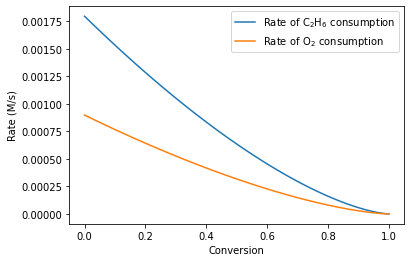

In [ ]:
k = 5.0 # M^(-1/2) s^(-1)
P = 2 # bar
R = 8.314 * 10**(-2)  # L bar K^(-1) mol^(-1)
T = 600 # K

V0 = R*T/P  # assume n0 = 1 mol

N_C2H6_0 = 1*0.2
N_O2_0 = 1*0.1

V = V0 # constant volume

rC2H6 = []
rO2 = []
x_list = np.linspace(0,1,100)

for x in x_list:
    C_C2H6 = N_C2H6_0/V * (1-x)
    C_O2 = N_C2H6_0/V * (N_O2_0/N_C2H6_0 - 0.5*x)

    rC2H6.append(k * C_C2H6**(0.5) * C_O2) # rate of C2H6 consumption
    
    rO2.append(k * C_C2H6**(0.5) * C_O2 * 0.5)  # rate of O2 consumption

plt.plot(x_list, rC2H6, label = 'Rate of C$_{2}$H$_{6}$ consumption')
plt.plot(x_list, rO2, label = 'Rate of O$_2$ consumption')
plt.xlabel('Conversion')
plt.ylabel('Rate (M/s)')
plt.legend()

plt.show()# Answer Here

### 1.2 Plot the concentrations of all species vs residence time in the reactor.

Let's say 

$\ce{C2H6} = A \quad \ce{O2} = B \quad \ce{C2H4} = D \quad \ce{H2O} = E$



$\frac{dN_{A}}{dt} = -r_{A}V$
 
$N_{A0}\frac{dX}{r_{A}V} = dt$

here,

$r_{A} = kC_{A}^{0.5}C_{B} = k (\frac{N_{A0}}{V}(1-X))^{0.5} \frac{N_{A0}}{V}(\frac{N_{B0}}{N_{A0}} - 0.5X)$

$dt = \frac{N_{A0}}{V} \frac{1}{kC_{A0}^2} \frac{dX}{r_{A}V}$

Integrate both sides

$t = \frac{1}{kC_{A0}} \int{\frac{1}{(1-X)^{0.5}(\gamma - 0.5X)}}dX, \quad \gamma = \frac{N_{B0}}{N_{A0}} = 0.5$


$t = \frac{1}{kC_{A0}} \frac{4}{(1-x)^{0.5}}$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


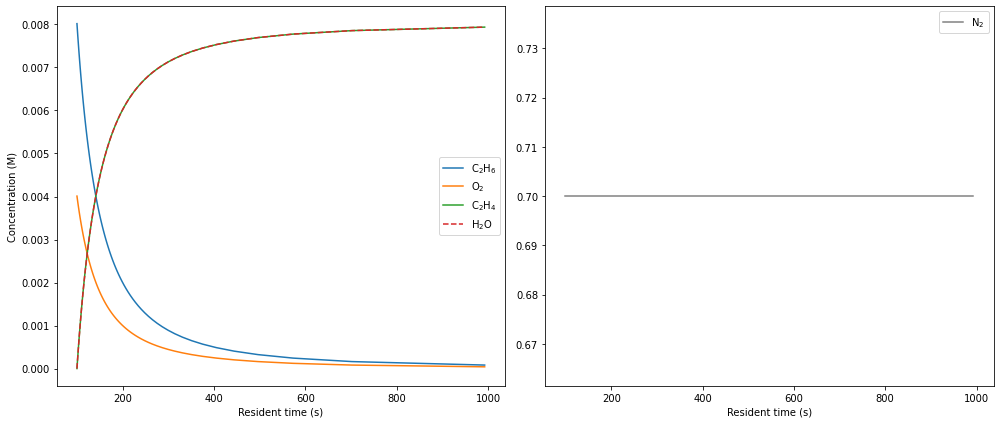

In [ ]:
# Answer Here

plt.subplots(1,2,figsize=(14,6))

N_C2H4_0 = 0
N_H2O_0 = 0

gamma = N_O2_0/N_C2H6_0

x_list = np.linspace(0.,1,100)
times = []

C_C2H6_list =[]
C_O2_list =[]
C_C2H4_list =[]
C_H2O_list =[]
C_N2_list =[]

for x in x_list:
    
    time = 1/k/(N_C2H6_0/V)* 4/((1-x)**(0.5))
    times.append(time)

    C_C2H6 = N_C2H6_0/V * (1-x)
    C_O2 = N_C2H6_0/V * (N_O2_0/N_C2H6_0 - 0.5*x)
    C_C2H4 = N_C2H6_0/V * (N_C2H4_0/N_C2H6_0 + x)
    C_H2O = N_C2H6_0/V * (N_H2O_0/N_C2H6_0 + x)
    C_N2 = 0.7
    
    C_C2H6_list.append(C_C2H6)
    C_O2_list.append(C_O2)
    C_C2H4_list.append(C_C2H4)
    C_H2O_list.append(C_H2O)
    C_N2_list.append(C_N2)

plt.subplot(1, 2, 1)
plt.plot(times, C_C2H6_list, label = 'C$_{2}$H$_6$')
plt.plot(times, C_O2_list, label = 'O$_2$')
plt.plot(times, C_C2H4_list, label = 'C$_2$H$_4$')
plt.plot(times, C_H2O_list, '--', label = 'H$_2$O')
plt.xlabel('Resident time (s)')
plt.ylabel('Concentration (M)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, C_N2_list, color = 'gray', label = 'N$_2$')
plt.xlabel('Resident time (s)')
# plt.ylabel('Concentration (M)')
plt.legend()

plt.tight_layout()

plt.show()

**An alternative approach is to solve the problem numerically using an ODE solver like that demonstrated in class.**

# 2 Not a laughing matter
Nitrous oxide ($\ce{N2O}$) decomposes to $\ce{N2}$ and $\ce{O2}$ at high temperature. Experiments were performed at constant $T$ in a constant volume batch reactor. You can assume the reaction rate has the form $k P_{\ce{N2O}}^a$.

| $P_{\ce{N2O}}$$_{,0}$ (torr) | $T$ (K) | half-life (s) |
|-------------------------|---------|---------------|
|                    82.5 |    1030 |           860 |
|                     139 |    1030 |           470 |
|                     296 |    1030 |           255 |
|                     360 |    1030 |           212 |
|                     345 |    1085 |            53 |
|                     360 |    1030 |           212 |
|                     294 |     967 |          1520 |

### 2.1 What is the reaction order?

Equations of half-life for 1st and nth order are:

1st order: $t_{1/2} = \frac{[N_{2}O]_{0}}{2k}$

nth order: $t_{1/2} = \frac{2^{n-1}}{(n-1)k[N_{2}O]_{0}^{n-1}}$

Here, $[N_{2}O] = \frac{P_{N_{2}O,0}}{RT}$


Assume 1st order

At the same T (= 1030 K), rate constant is the same.

$k = \frac{\ln\left(\frac{[N_{2}O]_{0}}{[N_{2}O]}\right)}{t}$

Take 1st and 2nd rows data, and calculate rate constant of each. 

$\rightarrow$ not the same. This is not 1st order reaction.


Let nth order,

Then k is

$k = \frac{2^{n-1}-1}{t_{1/2}(n-1)[N_{2}O]_{0}^{n-1}} = \frac{2^{n-1}-1}{(1/RT)^{n-1} t_{1/2}(n-1)P_{N_{2}O,0}^{n-1}}$

To simplify the equation, let's say 

$P_{N_{2}O,0} = P \quad  t_{1/2} = t$

at the same temperature, 

$\frac{k_{1}}{k_{2}} = 1 = \frac{t_{2} P_{2}^{n-1}}{t_{1} P_{1}^{n-1}}$

$n = 1+ \frac{ln(t_{1}/t_{2})}{ln(P_{2}/P_{1})}$

In [ ]:
# Answer Here
import numpy as np

half_t = [860, 470, 255, 212]
P0 = [82.5, 139, 296, 360]


n1 = 1+np.log(half_t[0]/half_t[1])/np.log(P0[1]/P0[0])
n2 = 1+np.log(half_t[0]/half_t[2])/np.log(P0[2]/P0[0])
n3 = 1+np.log(half_t[0]/half_t[3])/np.log(P0[3]/P0[0])
n4 = 1+np.log(half_t[1]/half_t[2])/np.log(P0[2]/P0[1])
n5 = 1+np.log(half_t[1]/half_t[3])/np.log(P0[3]/P0[1])
n6 = 1+np.log(half_t[2]/half_t[3])/np.log(P0[3]/P0[2])

print('n1 =', n1)
print('n2 =', n2)
print('n3 =', n3)
print('n4 =', n4)
print('n5 =', n5)
print('n6 =', n6)
print('average of n =',(n1+n2+n3+n4+n5+n6)/6)


n1 = 2.15819035519198
n2 = 1.951554321793365
n3 = 1.9504789660104103
n4 = 1.8089441223590441
n5 = 1.8366133242717426
n6 = 1.9434604687283246
average of n = 1.9415402597258111


n1 ~ n6 should be the same. But they are slightly different. This difference may come from an experimental error.

Thus, approximately reaction order, n $\approx$ 2 

### 2.2 What is the apparent activation energy?

$k = \frac{2^{n-1}-1}{t_{1/2}(n-1)[N_{2}O]_{0}^{n-1}} = \frac{2^{n-1}-1}{(1/RT)^{n-1} t_{1/2}(n-1)P_{N_{2}O,0}^{n-1}}$

n = 2

$ k = \frac{RT}{t_{1/2} P_{N_{2}O,0}} $

We can obtain list of k in the different T.

Then plot "ln k vs 1/T" (Arrhenius plot). The slope of Arrhenius plot is $-E_{a}/R$. 

Ea = 245.1 kJ/mol


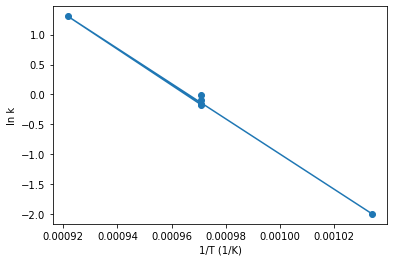

In [ ]:
# Answer Here
import matplotlib.pyplot as plt

half_t_list = [860, 470, 255, 212, 53, 1520]
P0_list = [82.5, 139, 296, 360, 345, 294]
T_list = [1030, 1030, 1030, 1030, 1085, 967]
invT_list = [1/x for x in T_list] # 1/T list

lnk_list = []
R = 62.364 # L Torr K^(-1) mol^(-1)
for T,t,P0 in zip(T_list, half_t_list, P0_list):
    lnk_list.append(np.log(R*T/t/P0))

plt.plot(invT_list, lnk_list, 'o-')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln k')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(np.array(invT_list), np.array(lnk_list), 1)

LTorr_to_KJ = 0.133322368*10**(-3)

Ea = -m*R*LTorr_to_KJ

print('Ea = {:.1f} kJ/mol'.format(Ea))

# 3 I’m getting dehydrated
*tert*-butanol can be dehydrated to isobutylene over an ion-exchange resin. An experiment was performed to follow the concentration of butanol vs time at 338 K. You can assume the reaction rate is only dependent on the concentration of *tert*-butanol under these reaction conditions.

| Time (h) | Butanol (M) |
|----------|-------------|
|        0 |        1.00 |
|     0.25 |        0.94 |
|     0.50 |        0.90 |
|     0.70 |        0.86 |
|     1.10 |        0.80 |
|     1.50 |        0.72 |
|     1.90 |        0.66 |
|     2.50 |        0.59 |
|     3.00 |        0.55 |
|     4.00 |        0.43 |
|     5.10 |        0.35 |
|     6.00 |        0.28 |

### 3.1 Write down the balanced reaction.

$\ce{C_4H_{9}OH -> C_4H_8 + H_2O}$ 

### 3.2 What is the reaction order?

In [ ]:
# Answer Here

time = np.array([0,0.25,0.50,0.70,1.10,1.50,1.90,2.50,3.00,4.00,5.10,6.00])*60*60 # convert unit of time from h to s
butanol = np.array([1.00,0.94,0.90,0.86,0.80,0.72,0.66,0.59,0.55,0.43,0.35,0.28]) # butanol concentration in M
# r = dc/dt
grad_t = np.gradient(time)  # second order approximation to gradient, allowing for unequal step size
grad_C = np.gradient(butanol)
rate = -np.divide(grad_C,grad_t)

**One approach is to plot log(rate) vs log(concentration) and do linear fitting to obtain reaction order. Another approached is to use curve_fit and fit rate vs concentration directly (like what we saw in class). Solutions using both approaches are shown here.**

The reaction order is 0.90.


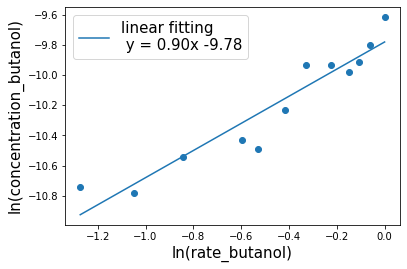

0.01392977075976469


In [ ]:
# Approach 1: linear fitting to log(rate) vs log(concentration)
log_rate = np.log(rate)
log_conc = np.log(butanol)
a = np.polyfit(log_conc, log_rate, 1) # the slope of log_rate vs log_conc is reaction order alpha

print("The reaction order is {:.2f}.".format(a[0]))

# Visualize the log_rate vs log_conc and the linear fitting
fitted_log_rate = log_conc*a[0] + a[1]
plt.scatter(log_conc, log_rate)
plt.plot(log_conc, fitted_log_rate, label='linear fitting \n y = {:.2f}x {:.2f}'.format(a[0], a[1]))

plt.xlabel('ln(rate_butanol)',fontsize=15)
plt.ylabel('ln(concentration_butanol)',fontsize=15)
plt.legend(fontsize=15)

plt.show()

# Check the MSE of the fitting
difference_array = np. subtract(log_rate, fitted_log_rate)
squared_array = np. square(difference_array)
mse = squared_array. mean()
print(mse)

k = 0.000060, the reaction order alpha=1.04


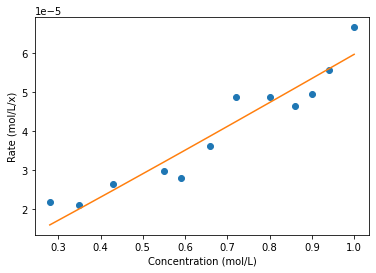

1.849674680049919e-11


In [ ]:
# Approach 2: use curve_fit and fit rate vs concentration directly

def differential(x, k, alpha):
    return k*x**alpha

popt, pcov = curve_fit(differential, butanol, rate)
print('k = {0:f}, the reaction order alpha={1:.2f}'.format(popt[0],popt[1]))

# Visualize the rate vs concentration and the fitting

plt.plot(butanol,rate,'o')
model = differential(butanol,popt[0],popt[1])
plt.plot(butanol,model,'-')
plt.xlabel('Concentration (mol/L)')
plt.ylabel('Rate (mol/L/x)')

plt.show()

# Check the MSE of the fitting
difference_array = np. subtract(rate, model)
squared_array = np. square(difference_array)
mse = squared_array. mean()
print(mse)

### 3.3 What is the rate constant at this temperature?

The rate constant at this temperature is 0.000062.


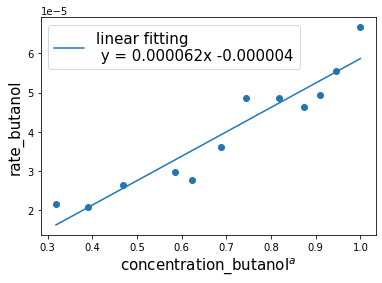

In [ ]:
# Answer Here

# Approach 1: linear fit to rate vs concetration to the power of reaction order
butanol_a = butanol**(a[0]) # concentration of butanol to the power of reaction order
b = np.polyfit(butanol_a, rate, 1) # the slope of rate vs butanol_a is the rate constant

print("The rate constant at this temperature is {:.6f}.".format(b[0]))

# Visualize the rate vs butanol_a and the linear fitting
fitted_rate = [i*b[0] + b[1] for i in butanol_a]
plt.scatter(butanol_a, rate)
plt.plot(butanol_a, fitted_rate, label='linear fitting \n y = {:.6f}x {:.6f}'.format(b[0], b[1]))

plt.xlabel('concentration_butanol$^a$',fontsize=15)
plt.ylabel('rate_butanol',fontsize=15)
plt.legend(fontsize=15)

plt.show()

k = 0.000058


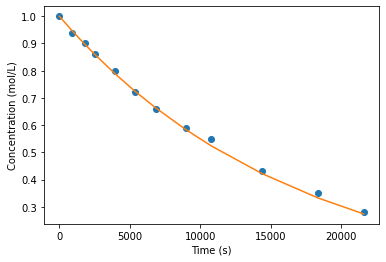

In [ ]:
# If using approach #2 in question 3.2, then it suggests reaction order of 1

def integral(time, k): # integrated first-order rate law C = C0*exp(-kt)
    return np.exp(-k*time) # initial concetration is 1 M

popt1, pcov1 = curve_fit(integral, time, butanol, 0.000060) # initial gas of k is from question 3.2
print('k = {0:f}'.format(popt1[0]))

model1 = integral(time, popt1[0])
plt.plot(time,butanol,'o')
plt.plot(time,np.exp(-0.00006*time),'-')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.show()

# 4 Pressure packed
$\ce{NH3}$ synthesis from $\ce{N2}$ and $\ce{H2}$ was studied in a constant volume reactor (0.315 l) over a Ru catalyst, in a clever setup in which the $\ce{NH3}$ was continuously removed from the reactor.  The total pressure in the reactor was followed vs time at three different compositions and at 350 $^{\circ}\text{C}$. The pressures are reported as their equivalent values at 298 K (ie $N/V = P/R\times 298 \text{K}$).

$\ce{N2}:\ce{H2}:\ce{He}$ = 3:1:0

| Pressure (torr) | 766.2 | 731.9 | 711.9 | 686.2 | 661.5 |
|-----------------|-------|-------|-------|-------|-------|
| Time (min)      |     0 |    18 |    30 |    42 |    54 |

$\ce{N2}:\ce{H2}:\ce{He}$ = 1:1:2

| Pressure (torr) | 753.4 | 737.5 | 726.6 | 709.5 | 700.3 |
|-----------------|-------|-------|-------|-------|-------|
| Time (min)      |     0 |    15 |    30 |    45 |    54 |

$\ce{N2}:\ce{H2}:\ce{He}$ = 1:3:0

| Pressure (torr) | 707.1 | 700.2 | 693.2 | 683.5 | 675.5 |
|-----------------|-------|-------|-------|-------|-------|
| Time (min)      |     0 |    15 |    30 |    45 |    55 |

### 4.1 Write down the balanced reaction.

$N_2+3H_2\rightarrow 2NH_3$

### 4.2 Plot the $\ce{N2}$ and $\ce{H2}$ concentrations (mol/vol) vs time for each initial condition.

case 1:

| | $N_2$ | $H_2$ |  $NH_3$ | $He$ |
| --- | --- | --- | --- | --- |
| Initial | 3$n_0$ | $n_0$ | 0 | 0 |
| Change  | $-\epsilon$ | $-3\epsilon$ | $2\epsilon$| 0 |
| End | $3n_0-\epsilon$ | $n_0-3\epsilon$ |  $2\epsilon$ | 0 |

$N_{total} = 4n_0-4\epsilon$

$n_0 = \frac{P_0V}{4RT}$

$N_{total}= \frac{PV}{RT}$

$\epsilon = \frac{P_0V}{4RT}-\frac{PV}{4RT} = (P_0-P)\frac{V}{4RT}$

$c_{N_2} = \frac{(3n_0-\epsilon)}{V}$

$c_{H_2} = \frac{(n_0-3\epsilon)}{V}$

case 2:

| | $N_2$ | $H_2$ |  $NH_3$ | $He$ |
| --- | --- | --- | --- | --- |
| Initial | $n_0$ | $n_0$ | 0 | 2$n_0$ |
| Change  | $-\epsilon$ | $-3\epsilon$ | $2\epsilon$| 2$n_0$ |
| End | $n_0-\epsilon$ | $n_0-3\epsilon$ |  $2\epsilon$ | 2$n_0$ |

$N_{total} = 4n_0-4\epsilon$

$n_0 = \frac{P_0V}{4RT}$

$N_{total}= \frac{PV}{RT}$

$\epsilon = \frac{P_0V}{4RT}-\frac{PV}{4RT} = (P_0-P)\frac{V}{4RT}$

$c_{N_2} = \frac{(n_0-\epsilon)}{V}$

$c_{H_2} = \frac{(n_0-3\epsilon)}{V}$

case 3:

| | $N_2$ | $H_2$ |  $NH_3$ | $He$ |
| --- | --- | --- | --- | --- |
| Initial | $n_0$ | $n_0$ | 0 | 0 |
| Change  | $-\epsilon$ | $-3\epsilon$ | $2\epsilon$| 0 |
| End | $n_0-\epsilon$ | $3n_0-3\epsilon$ |  $2\epsilon$ | 0 |

$N_{total} = 4n_0-4\epsilon$

$n_0 = \frac{P_0V}{4RT}$

$N_{total}= \frac{PV}{RT}$

$\epsilon = \frac{P_0V}{4RT}-\frac{PV}{4RT} = (P_0-P)\frac{V}{4RT}$

$c_{N_2} = \frac{(n_0-\epsilon)}{V}$

$c_{H_2} = \frac{(3n_0-3\epsilon)}{V}$


In [ ]:
# Answer Here
P_1 = np.array([766.2,731.9,711.9,686.2,661.5])
t_1 = np.array([0,18,30,42,54])
P_2 = np.array([753.4,737.5,726.6,709.5,700.3])
t_2 = np.array([0,15,30,45,54])
P_3 = np.array([707.1,700.2,693.2,683.5,675.5])
t_3 = np.array([0,15,30,45,55])

T = 298 #K
V = 0.315e-3 #m3
R = 8.314 #m3*/Pa/K/mol
#convert pressure to Pa
P_1 = P_1*133.322
P_2 = P_2*133.322
P_3 = P_3*133.322

#calculate extant of reaction
e_1 = []
e_2 = []
e_3 = []
for i in range(len(P_1)):
 e_1.append((P_1[0]-P_1[i])*V/R/T/4) 
 e_2.append((P_2[0]-P_2[i])*V/R/T/4)
 e_3.append((P_3[0]-P_3[i])*V/R/T/4)

#calculate concentration
c_N2_1 = []
c_H2_1 = []
c_N2_2 = []
c_H2_2 = []
c_N2_3 = []
c_H2_3 = []
for i in range(len(e_1)):
  c_N2_1.append(3*P_1[0]/R/T/4-e_1[i]/V)
  c_H2_1.append(1*P_1[0]/R/T/4-3*e_1[i]/V)
  c_N2_2.append(1*P_2[0]/R/T/4-e_2[i]/V)
  c_H2_2.append(1*P_2[0]/R/T/4-3*e_2[i]/V)
  c_N2_3.append(1*P_3[0]/R/T/4-e_3[i]/V)
  c_H2_3.append(3*P_3[0]/R/T/4-3*e_3[i]/V)

#convert to mol/L

for i in range(len(c_N2_1)):
  c_N2_1[i] = c_N2_1[i]/10**3
  c_H2_1[i] = c_H2_1[i]/10**3
  c_N2_2[i] = c_N2_2[i]/10**3
  c_H2_2[i] = c_H2_2[i]/10**3
  c_N2_3[i] = c_N2_3[i]/10**3
  c_H2_3[i] = c_H2_3[i]/10**3

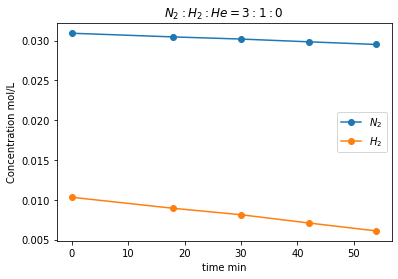

In [ ]:
plt.plot(t_1,c_N2_1,'o-',label = r'$N_2$')
plt.plot(t_1,c_H2_1,'o-',label = r'$H_2$')
plt.ylabel('Concentration mol/L')
plt.xlabel('time min')
plt.title(r'$N_2:H_2:He=3:1:0$')
plt.legend()
plt.show()

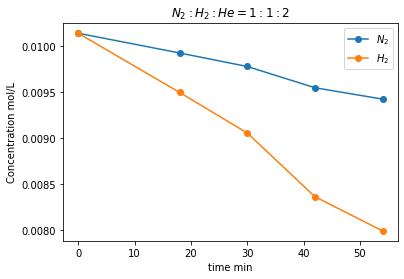

In [ ]:
plt.plot(t_1,c_N2_2,'o-',label = r'$N_2$')
plt.plot(t_1,c_H2_2,'o-',label = r'$H_2$')
plt.ylabel('Concentration mol/L')
plt.xlabel('time min')
plt.title(r'$N_2:H_2:He=1:1:2$')
plt.legend()
plt.show()

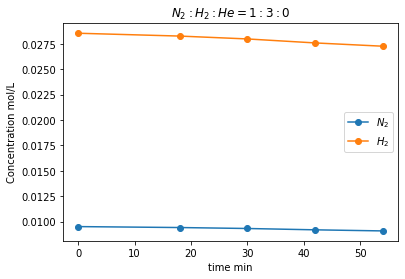

In [ ]:
plt.plot(t_1,c_N2_3,'o-',label = r'$N_2$')
plt.plot(t_1,c_H2_3,'o-',label = r'$H_2$')
plt.ylabel('Concentration mol/L')
plt.xlabel('time min')
plt.title(r'$N_2:H_2:He=1:3:0$')
plt.legend()
plt.show()

### 4.3 Use finite differences to make a table of reaction rates (moles/time/volume) vs composition (mol/vol $\ce{N2}$ and $\ce{H2}$).

$r = \frac{c(t_2)-c(t_1)}{t_2-t_1}$

In [ ]:
 # using second order accurate central differences in the interior points and the boundaries.
r_1 = (-1)*np.gradient(c_N2_1, t_1, edge_order=2) 
r_2 = (-1)*np.gradient(c_N2_2, t_2, edge_order=2)
r_3 = (-1)*np.gradient(c_N2_3, t_3, edge_order=2)

In [ ]:
#3:1:0
print(r'rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L')
for i in range(len(r_1)):
  print(round(r_1[i],6),round(c_N2_1[i],4),round(c_H2_1[i],4))

rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L
2.8e-05 0.0309 0.0103
2.4e-05 0.0305 0.0089
2.6e-05 0.0302 0.0081
2.8e-05 0.0298 0.0071
2.7e-05 0.0295 0.0061


In [ ]:
#1:1:2
print(r'rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L')
for i in range(len(r_1)):
  print(round(r_2[i],7),round(c_N2_2[i],4),round(c_H2_2[i],4))

rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L
1.65e-05 0.0101 0.0101
1.2e-05 0.0099 0.0095
1.26e-05 0.0098 0.0091
1.43e-05 0.0095 0.0084
1.32e-05 0.0094 0.008


In [ ]:
#3:1:0
print(r'rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L')
for i in range(len(r_1)):
  print(round(r_3[i],6),round(c_N2_3[i],4),round(c_H2_3[i],4))

rate mol/min/L   $N_2$ concentration mol/L   $H_2$ concentration mol/L
6e-06 0.0095 0.0285
6e-06 0.0094 0.0283
7e-06 0.0093 0.028
1e-05 0.0092 0.0276
1.2e-05 0.0091 0.0273


### 4.4 Use your rate data to determine a rate law and rate constant for the reaction at these conditions.

The rate law is r = 3.653039e-05[N2]^0.57*[H2]^-0.34
rate constant is 3.65e-05


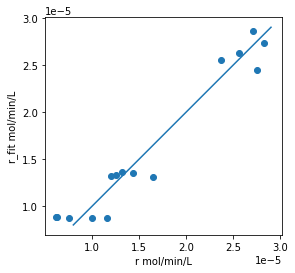

These three data set of rate have three different regimes of value. The top right corner regime corresopond to the first cases where N2:H2:H2 = 1:3:0. From parity plot we
found that this regime has the best correlation, so we can do a curve fit only with data from case 1 and use k,a,b wo got here as inital guess.


In [ ]:
#curve fit with data from all three cases
def rvsc(C,a,b,k):
  c_N2,c_H2 = C 
  return k*c_N2**a*c_H2**b

#use all data to fit
r = np.concatenate((r_1,r_2,r_3))
c_N2 = np.concatenate((c_N2_1,c_N2_2,c_N2_3))
c_H2 = np.concatenate((c_H2_1,c_H2_2,c_H2_3))

#curve fit

popt, pcov = curve_fit(rvsc,(c_N2,c_H2),r)
print('The rate law is r = {0:e}[N2]^{1}*[H2]^{2}'.format(popt[2], round(popt[0],2), round(popt[1],2)))
print('rate constant is', round(popt[2],7))

#a parity plot between rate from 4.3 and raw data from fit
r_fit = rvsc((c_N2,c_H2),*popt)
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.scatter(r,r_fit)
plt.xlabel('r mol/min/L')
plt.ylabel('r_fit mol/min/L')
x=np.arange(0.8e-5,3e-5,0.1e-5)
y=x
plt.plot(x,y)
plt.show()

print('These three data set of rate have three different regimes of value. The top right corner regime corresopond to the first cases where N2:H2:H2 = 1:3:0. From parity plot we')
print('found that this regime has the best correlation, so we can do a curve fit only with data from case 1 and use k,a,b wo got here as inital guess.')

The rate law is r = 5.614384e+25[N2]^22.85*[H2]^-2.1
rate constant is 5.614384183278626e+25


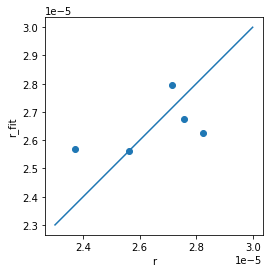

It turns our that even using the inital guess from previous calculation, we cant get a similar results with only one set of data.


In [ ]:
#curve fit only with data from 1:3:0 case

r = r_1
c_N2 = c_N2_1
c_H2 = c_H2_1

#curve fit

popt, pcov = curve_fit(rvsc,(c_N2,c_H2),r,[0.6,-0.3,3.653039e-05],maxfev = 100000)
print('The rate law is r = {0:e}[N2]^{1}*[H2]^{2}'.format(popt[2], round(popt[0],2), round(popt[1],2)))
print('rate constant is', round(popt[2],7))

r_fit = rvsc((c_N2,c_H2),*popt)

ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.scatter(r,r_fit)
plt.xlabel('r')
plt.ylabel('r_fit')
x=np.arange(2.3e-5,3e-5,0.1e-5)
y=x
plt.plot(x,y)
plt.show()

print('It turns our that even using the inital guess from previous calculation, we cant get a similar results with only one set of data.')